## DS School Data Analysis (Educaiton)

---

In [1]:
import pandas as pd
import sqlite3

In [2]:
pd.options.display.max_columns = 50

In [3]:
connect = sqlite3.connect('dsschool/dsschool.db')
connect

In [4]:
# check schema of the db
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, connect)

for i in schema['sql']:
    print(i)

CREATE TABLE "users" (
"user_id" TEXT,
  "mixpanel_id" TEXT,
  "payment_id" TEXT,
  "email" TEXT
)
CREATE INDEX "ix_users_user_id"ON "users" ("user_id")
CREATE TABLE "surveys" (
"survey_id" TEXT,
  "user_id" TEXT,
  "question_id" INTEGER,
  "answer1_selected" TEXT,
  "answer2_selected" TEXT,
  "answer3_selected" TEXT,
  "answer4_selected" TEXT,
  "answer5_selected" TEXT,
  "answer6_selected" TEXT,
  "answer7_selected" TEXT,
  "answer8_selected" TEXT,
  "answer9_selected" TEXT,
  "answer10_selected" TEXT,
  "answer11_selected" TEXT,
  "answer12_selected" TEXT,
  "created_at" TEXT,
  "updated_at" TEXT
)
CREATE INDEX "ix_surveys_survey_id"ON "surveys" ("survey_id")
CREATE TABLE "payments" (
"payment_id" TEXT,
  "이름" TEXT,
  "이메일" TEXT,
  "연락처" TEXT,
  "신청날짜" TEXT,
  "신청수업" TEXT,
  "금액" TEXT,
  "결제방법" TEXT,
  "상태" TEXT
)


In [4]:
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [5]:
# Write your code here!
surveys = surveys.sort_values(by =['user_id', 'question_id','created_at'])
print(surveys.shape)
surveys.head()

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

In [6]:
# Write your code here!
for i in range(1,13):
    old_column = f'answer{i}_selected'
    new_column = f'answer{i}_selected(bool)'
    surveys[new_column] = surveys[old_column] == 't'

print(surveys.shape)
surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [7]:
# Write your code here!
surveys['created_at'] = pd.to_datetime(surveys['created_at']) 
surveys['updated_at'] = pd.to_datetime(surveys['updated_at']) 

In [8]:
 # Write your code here!
surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep='last') 
print(surveys.shape)

(93481, 29)


---

In [71]:
# Write your code here!
query = """ Select * From 'payments'
"""
#connect = sqlite3.connect('dsschool/dsschool.db')

payments = pd.read_sql(query, connect)
print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


In [72]:
# Write your code here!
import numpy as np

In [73]:
#regular expression
df_payments = payments.copy()
regex = r'[0,\+]\d+-?\d+-?\d+'
df_payments.loc[~df_payments['연락처'].str.match(regex), '연락처'] = np.nan
#checking
df_payments[pd.isnull(df_payments['연락처'])]


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
176,ifspe8kxi9yy,권승혜,grga5sxl4bw3@dsschool.co.kr,NaN,2018-01-03 10:01:34,입문반 19기,"495,000",무통장 입금,결제 완료
261,vlm10532atv8,신소은,xieyg97f841s@dsschool.co.kr,NaN,2017-12-17 19:37:05,중급반 4기,"594,000",카드결제,결제 완료
707,pat88ribf516,류수정,ykhc2wike7f8@dsschool.co.kr,NaN,2017-09-04 10:39:30,입문반 8기,"495,000",카드결제,처리 중
708,eqmbwmn5nenl,홍재현,fxxf6hxo6495@dsschool.co.kr,NaN,2017-09-04 10:38:49,입문반 8기,"495,000",카드결제,결제 완료
843,ph1uizfrf4g7,서민상,d3wg8ifa5fue@dsschool.co.kr,NaN,2017-07-28 21:01:19,입문반 5기,"495,000",카드결제,처리 중


In [75]:
valid_phone_number = (payments["연락처"].str.contains("^010|\+82"))

payments["연락처(clean)"] = payments["연락처"]

payments.loc[~valid_phone_number, "연락처(clean)"] = pd.np.nan

print(payments.shape)
payments.loc[~valid_phone_number, ["이름","연락처", "연락처(clean)"]].head()

(937, 10)


,이름,연락처,연락처(clean)
176,권승혜,asdasda,NaN
261,신소은,0thed0nonn,NaN
707,류수정,123131,NaN
708,홍재현,16474540316,NaN
843,서민상,Mana,NaN


In [76]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수를 만들어 주세요. 그리고 apply를 이용해 이를 적용해주세요.
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

    
    if "-" in phone_number:
        return phone_number
    
    
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number


#Write your code here!
df_payments["연락처(clean)"] = df_payments["연락처"].apply(clean_phone_number)
#checking
df_payments.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577


In [13]:
# string.split() 사용 예시입니다. 구분 기준마다 문자를 나누어 리스트로 만들어줍니다.
print('010-1234-5678'.split('-'))

#별도로 구분 기준을 정해주지 않는 경우 자동으로 공백을 기준으로 분리합니다.
print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [14]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용합니다.
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [77]:
for num, sub in enumerate(df_payments["신청수업"]):
    df_payments.loc[num, "수업타입"] = sub.split(" ")[0]
    df_payments.loc[num, "기수"] = sub.split(" ")[1]
    
#checking
df_payments[["신청수업","수업타입","기수"]].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


In [ ]:
"""#신청수업을 띄어쓰기를 기준으로 split합니다. 그리고 이를 이용하여 수업타입과 기수를 분리해줍니다.
payments['기수'] = payments['신청수업'].str.split().map(lambda row : row[-1])

#join을 사용하여 마지막을 제외한 모든 리스트의 문자들을 붙여줍니다.
payments['수업타입'] = payments['신청수업'].str.split().map(lambda row : ''.join(row[:-1]))


payments[['신청수업', '수업타입', '기수']].head()"""

---

In [78]:
#Write your code here!
df_payments["신청날짜"] = pd.to_datetime(df_payments["신청날짜"])
df_payments.dtypes

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
dtype: object

In [79]:
df_payments["상태(bool)"] = df_payments["상태"] == "결제 완료"
#checking
df_payments[df_payments["상태(bool)"] == False].head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool)
97,x2dsnxoqwj1z,정슬윤,9hw0qulkpbu2@dsschool.co.kr,010-4876-6543,2018-01-14 01:33:13,입문반 22기,"495,000",카드결제,처리 중,010-4876-6543,입문반,22기,False
102,1lj29015rast,전승연,efvllopvujv4@dsschool.co.kr,01033844500,2018-01-12 21:50:53,중급반 5기,"594,000",카드결제,처리 중,010-3384-4500,중급반,5기,False
139,433p5qzy5wub,유세은,nbtso5z1vfqk@dsschool.co.kr,010-0260-6400,2018-01-06 19:02:08,중급반 5기,"594,000",무통장 입금,처리 중,010-0260-6400,중급반,5기,False
194,gogfzaulikgh,송서윤,dgjt6tawia3t@dsschool.co.kr,01023350330,2018-01-01 09:32:52,입문반 18기,"495,000",무통장 입금,처리 중,010-2335-0330,입문반,18기,False
341,m6qhoalugxh6,문윤우,5jrpjpbhq8e7@dsschool.co.kr,010-4458-7770,2017-11-28 13:30:38,딥러닝 2기,"1,043,000",무통장 입금,처리 중,010-4458-7770,딥러닝,2기,False


---

In [18]:
# make dict for week
week ={6:'Sunday', 
              0:'Monday', 
              1:'Tuesday', 
              2:'Wednesday', 
              3:'Thursday',  
              4:'Friday', 
              5:'Saturday'}

In [80]:
df_payments["신청날짜(연)"] = df_payments["신청날짜"].dt.year
df_payments["신청날짜(월)"] = df_payments["신청날짜"].dt.month
df_payments["신청날짜(일)"] = df_payments["신청날짜"].dt.day
df_payments["신청날짜(시)"] = df_payments["신청날짜"].dt.hour
df_payments["신청날짜(시)"] = df_payments["신청날짜"].dt.hour
df_payments["신청날짜(분)"] = df_payments["신청날짜"].dt.minute
df_payments["신청날짜(초)"] = df_payments["신청날짜"].dt.second
df_payments["신청날짜(요일)"] = df_payments["신청날짜"].dt.day_name()



In [ ]:
"""df_payments['weekday'] = df_payments["신청날짜"].dt.dayofweek
df_payments["신청날짜(요일)"]= df_payments["신청날짜"].dt.dayofweek
df_payments["신청날짜(요일)"].replace(week, inplace=True)"""

In [20]:
"""# Change it as int 
records = []
for num in df_payments['금액']:
    record =num.split(",")
    records.append(''.join(record))

df_payments["금액(int)"] = records
df_payments["금액(int)"] = df_payments["금액(int)"].astype("int")"""

In [82]:
# 문자 자료형인 금액을 ,를 제거한 뒤 숫자 자료형(int)로 만들어주세요.
# ,를 제거할 때, Series.str.replace() 함수를 사용할 수 있습니다.
df_payments['금액(int)'] = df_payments['금액'].str.replace(',', '').astype(int)

print(df_payments.dtypes)
df_payments[["금액", "금액(int)"]].head()

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
상태(bool)                bool
신청날짜(연)                int64
신청날짜(월)                int64
신청날짜(일)                int64
신청날짜(시)                int64
신청날짜(분)                int64
신청날짜(초)                int64
신청날짜(요일)              object
금액(int)                int64
dtype: object


,금액,금액(int)
0,"495,000",495000
1,"594,000",594000
2,"495,000",495000
3,"495,000",495000
4,"594,000",594000


In [83]:
#checking 
df_payments.iloc[:,13:].head()

,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,2018,1,31,15,42,20,Wednesday,495000
1,2018,1,31,15,29,24,Wednesday,594000
2,2018,1,31,14,4,14,Wednesday,495000
3,2018,1,31,10,18,19,Wednesday,495000
4,2018,1,30,19,12,54,Tuesday,594000


---

In [86]:
weekday = ["Monday","Tuesday", "Wednesday","Thursday", "Friday", "Saturday","Sunday"]
df_weekday = pd.pivot_table(df_payments, index="신청날짜(요일)", values = "금액(int)",  aggfunc=['sum','count'])
df_weekday.loc[weekday]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


In [23]:
"""weekday = ["Monday","Tuesday", "Wednesday","Thursday", "Friday", "Saturday","Sunday"]
df_weekday = pd.pivot_table(df_payments, index="신청날짜(요일)", values = "금액(int)",  aggfunc=['sum','count'])
df_weekday
df_weekday.index =[4, 0, 5, 6, 3, 1, 2]
df_weekday.sort_index(inplace=True)
df_weekday.index = weekday
#checking
df_weekday"""

,sum,count
,금액(int),금액(int)
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


In [24]:
#Write your code here!
pd.pivot_table(df_payments, index="신청날짜(시)", values = "금액(int)",  aggfunc=['sum','count'])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


In [87]:
# 파이썬 데이터프레임에는 .plot() 메소드가 있습니다. matplotlib을 이용하는데, matplotlib이 한글을 기본으로 인식하지 못하기 때문에 폰트를 수정해주어야 합니다.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'

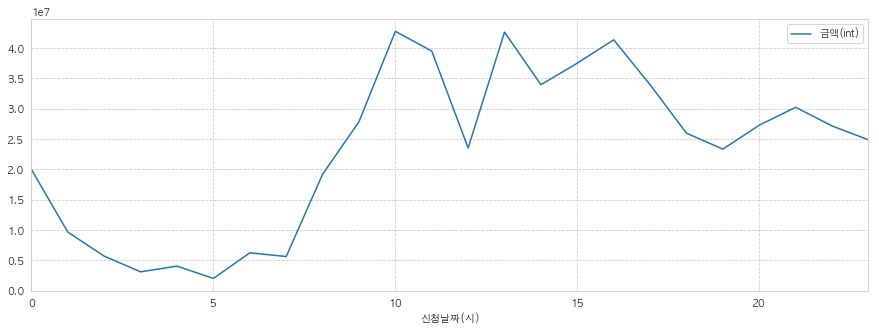

In [90]:
df_payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc='sum').plot(figsize=[15,5])

---

In [25]:
#리스트 안에 for 문을 넣을 수 있습니다.
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]
index = ['question_id',
 'answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [95]:
#pivot table을 만들어주세요.
table = pd.pivot_table(surveys,
                       index = 'question_id',
                       values = answer_list,
                       aggfunc = pd.np.mean,
                       dropna = False)
table = table[answer_list].loc[[1,3]]
table

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


In [26]:
"""# get only 1 and 3 id
ex = surveys.loc[(surveys["question_id"] == 1) | (surveys["question_id"] == 3), index]"""

In [27]:
"""# num3 can be selected multiple times. 
total_num3 = surveys.loc[surveys["question_id"] == 3,'question_id'].value_counts()[3]"""

In [28]:
"""# change it as number 
for i in range(1,13):
    ex.loc[ex[f"answer{i}_selected(bool)"] == True, f"answer{i}_selected(bool)"] = 1
    ex.loc[ex[f"answer{i}_selected(bool)"] == False, f"answer{i}_selected(bool)"] = 0 """

In [29]:
"""df_ans=pd.pivot_table(ex, index="question_id",aggfunc='sum')
df_ans.iloc[0] = df_ans.iloc[0] / df_ans.iloc[0].sum()
df_ans.iloc[1] = df_ans.iloc[1] / total_num3"""

In [30]:
"""# change in order
df_ans=df_ans[answer_list]
# checkig 
df_ans"""

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


In [31]:
query = "SELECT * FROM 'users'"
users = pd.read_sql(query, connect)
print(users.shape)

(48030, 4)


In [32]:
users.columns = ['user_id', 'mixpanel_id', 'payment_id', '이메일']

In [33]:
df_join = df_payments.merge(users, on = '이메일', how = 'inner')

In [34]:
df_join = df_join.merge(surveys, on = "user_id", how = 'inner')

In [ ]:
"""#payments와 users가 병합된 테이블에 다시 surveys를 병합합니다. 모든 병합은 inner로 진행합니다.
data = (
    payments.merge(users, left_on = '이메일', right_on='email', how='inner')
#surveys와는 user_id를 기준으로 병합합니다.
                    .merge(surveys, on='user_id', how='inner')
)"""

In [35]:
# checking
print(df_join.shape)
df_join.head(3)

(3035, 53)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),weekday,신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,2,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,2,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,2,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False


---

`SELECT () FROM () INNER JOIN () ON () INNER JOIN () ON ()` 

In [36]:
# Write your code here!
query = """
    SELECT * FROM 'payments' INNER JOIN 'users' ON 'payments'.이메일 = 'users'.email 
    INNER JOIN 'surveys' ON  'users'.user_id = 'surveys'.user_id 

"""

"""query = "SELECT * FROM payments \
         INNER JOIN users ON payments.이메일 = users.email \
         INNER JOIN surveys ON users.user_id = surveys.user_id" \
"""

df_join_sql = pd.read_sql(query, connect)
#checking
print(df_join_sql.shape)
df_join_sql.head(3)
# Question: Shapes are different?

(3884, 30)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152


---

In [37]:
# 분석에 필요한 컬럼들의 리스트입니다.
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남겨주세요.

#Write your code here!
print(df_join.shape)
df_join_new =df_join[selected_columns]

(3035, 53)


In [96]:
#Write your code here!
#신청날짜가 created_at보다 크거나 같은 경우만 남깁니다. 이는 결제를 한 이후에도 설문조사를 한 경우를 배제하기 위함입니다.
data = df_join_new[df_join_new['신청날짜'] >= df_join_new['created_at']]

In [97]:
# 이 중, 이메일과 신청수업, question_id가 중복되는 경우는 drop_duplicates를 이용해 첫 정보만 남겨주세요. 첫 정보만 남기는 방법은 keep 옵션을 활용하시면 됩니다.

data = data.sort_values(by = ["이메일", "question_id", "created_at"])
data = data.drop_duplicates(['이메일', '신청수업', "question_id"], keep='last')

print(data.shape)
data.head()

(1092, 26)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at,time
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526,0.384916
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112,0.384869
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999,0.384714
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555,0.384666
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220,0.384622


In [ ]:
"""df_join_new=df_join_new.sort_values(by =["created_at","신청날짜"])
print(df_join_new.shape)
df_join_new.head()"""

---

In [98]:
# Pivot Table
# fixed
table_purchased = pd.pivot_table(data,
                                 index='question_id',
                                 values=answer_list,
                                 aggfunc='mean')

table_purchased = table_purchased[answer_list].loc[[1,3]]

table_purchased

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


In [41]:
"""ex = df_join_new.loc[(df_join_new["question_id"] == 1) | (df_join_new["question_id"] == 3), index]
# num3 can be selected multiple times. 
total_num3 = df_join_new.loc[df_join_new["question_id"] == 3,'question_id'].value_counts()[3]
# change it as number 
for i in range(1,13):
    ex.loc[ex[f"answer{i}_selected(bool)"] == True, f"answer{i}_selected(bool)"] = 1
    ex.loc[ex[f"answer{i}_selected(bool)"] == False, f"answer{i}_selected(bool)"] = 0
df_ans=pd.pivot_table(ex, index="question_id",aggfunc='sum')
df_ans.iloc[0] = df_ans.iloc[0] / df_ans.iloc[0].sum()
df_ans.iloc[1] = df_ans.iloc[1] / total_num3
# change in order
df_ans=df_ans[answer_list]
# checkig 
df_ans
"""

'df_plot=df_ans.reset_index()\ndf_plot.plot(kind="bar", x="question_id", legend=False)'

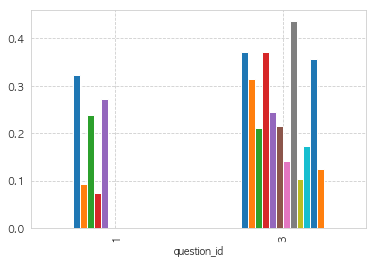

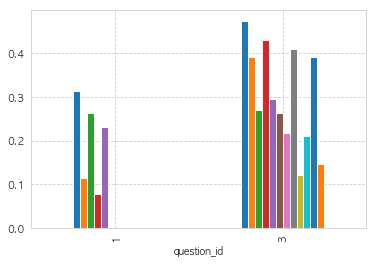

In [99]:
# 그래프를 주피터 화면에 띄우기 위한 주피터 명령어입니다.
%matplotlib inline

table.plot(kind='bar', legend=False)

table_purchased.plot(kind='bar', legend=False)


"""df_plot=df_ans.reset_index()
df_plot.plot(kind="bar", x="question_id", legend=False)"""

In [100]:
#신청날짜와 created_at은 datetime형식이기 때문에 연산이 가능합니다.
data["time"]=data["신청날짜"]-data["created_at"]
data['time']=data['time'].dt.total_seconds()/(60*60*24)
data['time']=data['time'].astype(float)

In [ ]:
""" The another way to solve 
time = data['신청날짜'] - data['created_at']
time.head()
#time.dt.components 를 이용하면 해당 시간의 정보를 DataFrame으로 만들어줍니다.
time.dt.components.head(2)

time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()"""

In [102]:
#checking
data.loc[887:892,["신청날짜","created_at",'time']]

,신청날짜,created_at,time
887,2018-01-17 15:45:55,2018-01-17 06:31:38.247526,0.384916
888,2018-01-17 15:45:55,2018-01-17 06:31:42.281112,0.384869
889,2018-01-17 15:45:55,2018-01-17 06:31:55.697999,0.384714
890,2018-01-17 15:45:55,2018-01-17 06:31:59.842555,0.384666
891,2018-01-17 15:45:55,2018-01-17 06:32:03.640220,0.384622
892,2018-01-17 15:45:55,2018-01-17 06:32:08.857982,0.384562


In [103]:
# get only possitive values
df_time = data.loc[df_join_new['time']>=0, "time"] 

In [49]:
#그래프를 그리기 위한 library를 불러옵니다.
import seaborn as sns
# import matplotlib.pyplot as plt

In [50]:
# seaborn의 경우 테마설정을 다음과 같이 할 수 있습니다. 사전 구성된 테마는 다음과 같습니다. {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid", {'grid.linestyle': '--'})

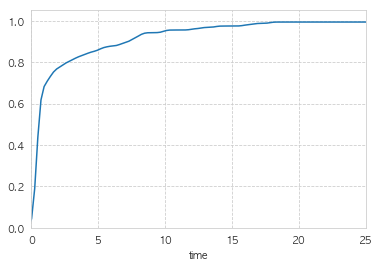

In [104]:
# distplot을 그려주세요, kde_kws={'cumulative' : True} 옵션을 통해 누적분포를 그리는 것이 좋습니다. 또한, hist=False로 하는 것이 보기에 좋을 수 있습니다.
import matplotlib.pyplot as plt
#Write your code here!
plt.xlim(0, 25)
sns.distplot(df_time, kde_kws={'cumulative' : True}, hist=False)



In [ ]:
# the another way 
"""plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,
                  hist=False,
                  #hist_kws=dict(cumulative=True),
                  kde_kws={'cumulative' : True})

ax.set_xlim(0, 25)"""

In [52]:
#write your code here!
mixpanel = pd.read_csv("dsschool/mixpanel_people_profiles_revised.csv")

In [53]:
users.columns

Index(['user_id', 'mixpanel_id', 'payment_id', '이메일'], dtype='object')

In [54]:
df_payments.columns

Index(['payment_id', '이름', '이메일', '연락처', '신청날짜', '신청수업', '금액', '결제방법', '상태',
       '연락처(clean)', '수업타입', '기수', '상태(bool)', '신청날짜(연)', '신청날짜(월)', '신청날짜(일)',
       '신청날짜(시)', '신청날짜(분)', '신청날짜(초)', 'weekday', '신청날짜(요일)', '금액(int)'],
      dtype='object')

In [55]:
mixpanel.columns

Index(['class_name', 'created_at', 'initial_referring_domain',
       'utm_campaign [first touch]', 'utm_campaign [last touch]',
       'utm_content [first touch]', 'utm_content [last touch]',
       'utm_medium [first touch]', 'utm_medium [last touch]',
       'utm_source [first touch]', 'utm_source [last touch]',
       'utm_term [first touch]', 'utm_term [last touch]', 'initial_referrer',
       'last_seen', 'os', 'browser', 'city', 'country_code', 'distinct_id'],
      dtype='object')

In [56]:
df_mixpanel = mixpanel.merge(users, left_on = "distinct_id", right_on = "mixpanel_id", how = 'inner' )
df_total = df_mixpanel.merge(df_payments, on = "payment_id", how = 'left')

In [ ]:
"""mixpanel_payments = (
    mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id')
)    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()"""

In [105]:
# checking
print(df_total.shape)
df_total.head()

(13875, 45)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,이메일_x,이름,이메일_y,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),weekday,신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,6.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_copy = df_total.copy()

In [107]:
df_copy.loc[df_copy["상태(bool)"] == True, "상태(bool)"] = 1
df_copy.loc[df_copy["상태(bool)"] != 1, "상태(bool)"] = 0

In [108]:
df_campaign=pd.pivot_table(df_copy, index= "utm_campaign [first touch]", values="상태(bool)", aggfunc = 'mean').sort_values(by = "상태(bool)", ascending=False)

In [ ]:
"""mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]
#평균을 단순하게 mean으로 연산하기 위해 bool 타입 데이터를 정수형으로 변환해줍니다.
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)"""

In [109]:
#checking 
df_campaign.head(10)

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
dripinsta7,0.066667
kang1,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


In [119]:
df_20 =pd.DataFrame(df_copy.groupby("utm_campaign [first touch]")["상태(bool)"].count()).sort_values(by="상태(bool)", ascending=False)

In [122]:
df_20=df_20[df_20["상태(bool)"] >=20]
df_20.index

Index(['no', '$none', 'soldout', 'deeplearningtraffic', 'problem', 'ryoovideo',
       'byung', 'ibm', 'yujin', 'joosang', 'mailchimp_drip', 'facebook',
       'univmajor', 'storyofkang', 'online', 'purchasers1lal', 'search1',
       'googleio', 'fbpage', 'kakaoj', 'deepyoon', 'deeplearn2',
       'globalconvpurchase1lal', '1stperson', 'Clab', 'sungwon', 'startup',
       'hotsix', 'mashup', 'ibm2', 'purchasers1 lal', 'dripinsta7', 'no5',
       'purchase_complete', 'achievements', 'search2', 'emnet', 'leveltest',
       'namsanghoon', 'kangretargeting', 'be_growth', 'threelong', '50off'],
      dtype='object', name='utm_campaign [first touch]')

In [ ]:
"""campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()
over20_campaign = campaign[campaign > 20]
over20_campaign.head()
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

(
    pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)"""

In [123]:
over20_data =df_copy[df_copy['utm_campaign [first touch]'].isin(df_20.index)] # any values with df_20 index

In [125]:
(
    pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False)
    .head(10)
)

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
no,0.028981
univmajor,0.028037
sungwon,0.026316


In [129]:
#Write your code here!
payments = df_payments.copy()

In [130]:
payments_complete = payments[payments["상태(bool)"] == True]

In [131]:
payments_complete = payments_complete.sort_values('신청날짜')
payments_complete = payments_complete.drop_duplicates(['이름', '이메일', "신청수업"], keep='last')

In [132]:
payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]

In [133]:
payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름', '이메일', "신청수업"])

In [138]:
payments_complete[payments_complete.duplicated(subset=['이름', '이메일'], keep=False)].head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,딥러닝,2기,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,입문반,11기,True,2017,10,18,11,23,25,Wednesday,495000
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,중급반,4기,True,2017,11,22,8,7,11,Wednesday,594000
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,딥러닝,1기,True,2017,11,4,17,50,57,Saturday,1043000
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,입문반,9기,True,2017,9,13,22,56,56,Wednesday,495000


In [139]:
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수') # to_frame(name=? ), change it as dataframe and col_name as ? 

print(num_bought.shape)
num_bought.head(5)

(149, 1)


,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
18vwfdfclejc@dsschool.co.kr,3
e7mf90zwvksp@dsschool.co.kr,3
e57r0bnxz4du@dsschool.co.kr,3
ewgzngg51eyr@dsschool.co.kr,3
